<!DOCTYPE html>
<html>
<body>
<div align="center">
<h3>Made by Manthan A Panchal</h3>
    
<h1>Random Forest Classification Model</h1>

<h3>Follow Me on - <a href="https://www.linkedin.com/in/manthan-panchal-046b3b198/">LinkedIn</a>&nbsp; 
</div>

</div>
</body>
</html>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix

pd.set_option('display.max_rows', None)
plt.style.use('seaborn-darkgrid')

In [2]:
df = pd.read_csv('Company_Data.csv')
df['Target'] = ''
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Target
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes,
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No,
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes,
8,6.54,132,110,0,108,124,Medium,76,10,No,No,
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes,


In [3]:
df.columns = df.columns.str.strip()

In [4]:
df.loc[df.Sales <=8, 'Target'] = 'BAD'
df.loc[df.Sales > 8, 'Target'] = 'GOOD'
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Target
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,GOOD
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,GOOD
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,GOOD
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,BAD
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,BAD


In [5]:
yesno = ['Yes', 'No']
shelve = ['Good', 'Medium', 'Bad']

In [6]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'Target'],
      dtype='object')

In [7]:
[cols for cols in df.columns if df[cols].dtype !='O']

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education']

In [8]:
[cols for cols in df.columns if df[cols].dtype == 'O']

['ShelveLoc', 'Urban', 'US', 'Target']

In [9]:
CT = ColumnTransformer([
    ('feature_scaling', MinMaxScaler(), ['Sales','CompPrice' , 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']),
    ('encoding', OrdinalEncoder(categories = [shelve, yesno, yesno ]), ['ShelveLoc', 'Urban', 'US']),
], remainder = 'drop')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['Target'], axis=1), 
    df.Target, test_size=0.30, 
    random_state = 2)

In [13]:
pipe  = Pipeline([
    ('column_transformer', CT),
    ('Model ', RandomForestClassifier(n_estimators=5)),

])

In [14]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('feature_scaling',
                                                  MinMaxScaler(),
                                                  ['Sales', 'CompPrice',
                                                   'Income', 'Advertising',
                                                   'Population', 'Price', 'Age',
                                                   'Education']),
                                                 ('encoding',
                                                  OrdinalEncoder(categories=[['Good',
                                                                              'Medium',
                                                                              'Bad'],
                                                                             ['Yes',
                                                                              'No'],
                                      

In [16]:
pipe.score(X_train, y_train)

1.0

In [18]:
y_pred = pipe.predict(X_test)

In [19]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[73,  2],
       [ 0, 45]], dtype=int64)

Text(40.08333333333333, 0.5, 'Predicted Values')

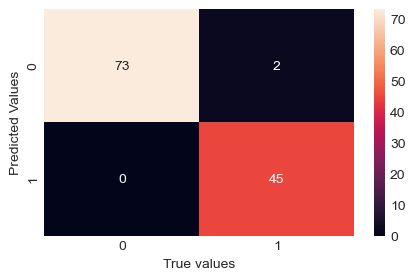

In [23]:
plt.figure(figsize=(5,3), dpi = 100)
sns.heatmap(cm, annot=True)
plt.xlabel('True values')
plt.ylabel('Predicted Values')

In [24]:
pipe.score(X_test, y_test)

0.9833333333333333